In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

print("Sentiment Shape:", sentiment.shape)
print("Trades Shape:", trades.shape)



Sentiment Shape: (2644, 4)
Trades Shape: (211224, 16)


In [3]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
print("Sentiment Missing Values:\n")
print(sentiment.isnull().sum())

print("\nTrades Missing Values:\n")
print(trades.isnull().sum())

Sentiment Missing Values:

timestamp         0
value             0
classification    0
date              0
dtype: int64

Trades Missing Values:

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [6]:
print("Sentiment Duplicates:", sentiment.duplicated().sum())
print("Trades Duplicates:", trades.duplicated().sum())

Sentiment Duplicates: 0
Trades Duplicates: 0


In [7]:
sentiment['date'] = pd.to_datetime(sentiment['date'])

trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True)

trades['date'] = trades['Timestamp IST'].dt.date

print("Sentiment Date Range:")
print(sentiment['date'].min(), "to", sentiment['date'].max())

print("\nTrader Date Range:")
print(trades['date'].min(), "to", trades['date'].max())

Sentiment Date Range:
2018-02-01 00:00:00 to 2025-05-02 00:00:00

Trader Date Range:
2023-05-01 to 2025-05-01


In [8]:
sentiment['classification'].value_counts()

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

In [9]:
sentiment['sentiment'] = sentiment['classification'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
})

In [10]:
trades['date'] = pd.to_datetime(trades['date'])

In [11]:
merged = trades.merge(
    sentiment[['date','sentiment']],
    on='date',
    how='inner'
)

print("Merged Shape:", merged.shape)
merged.head()

Merged Shape: (211218, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Greed


In [12]:
merged['win'] = merged['Closed PnL'] > 0

In [13]:
daily_pnl = merged.groupby(['Account','date'])['Closed PnL'].sum().reset_index()
daily_pnl.head()

,Account,date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


In [14]:
win_rate = merged.groupby('Account')['win'].mean().reset_index()
win_rate.rename(columns={'win':'win_rate'}, inplace=True)
win_rate.head()

,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [15]:
trades_per_day = merged.groupby(['date','sentiment']).size().reset_index(name='trade_count')
trades_per_day.head()

,date,sentiment,trade_count
0,2023-05-01,Greed,3
1,2023-12-05,Greed,9
2,2023-12-14,Greed,11
3,2023-12-15,Greed,2
4,2023-12-16,Greed,3


In [16]:
pd.crosstab(
    merged['sentiment'],
    merged['Side'],
    normalize='index'
)

Side,BUY,SELL
sentiment,,
Fear,0.495032,0.504968
Greed,0.470857,0.529143
Neutral,0.503343,0.496657


In [17]:
avg_pnl = merged.groupby('sentiment')['Closed PnL'].mean()
print(avg_pnl)

sentiment
Fear       49.212077
Greed      53.882281
Neutral    34.307718
Name: Closed PnL, dtype: float64


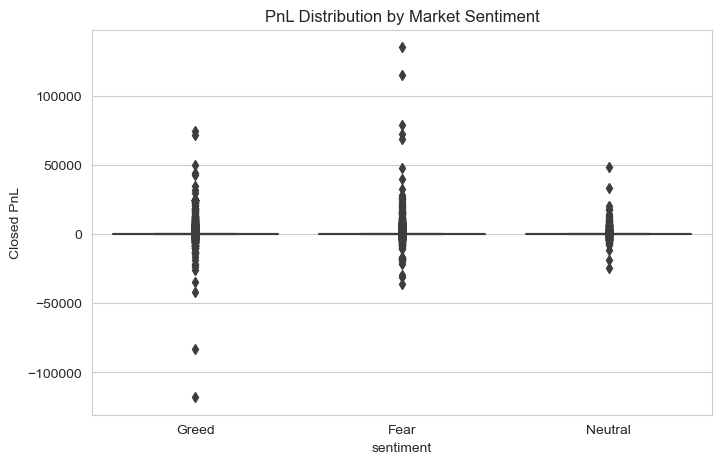

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='Closed PnL', data=merged)
plt.title("PnL Distribution by Market Sentiment")
plt.show()

In [19]:
win_by_sentiment = merged.groupby('sentiment')['win'].mean()
print(win_by_sentiment)

sentiment
Fear       0.407871
Greed      0.420311
Neutral    0.396991
Name: win, dtype: float64


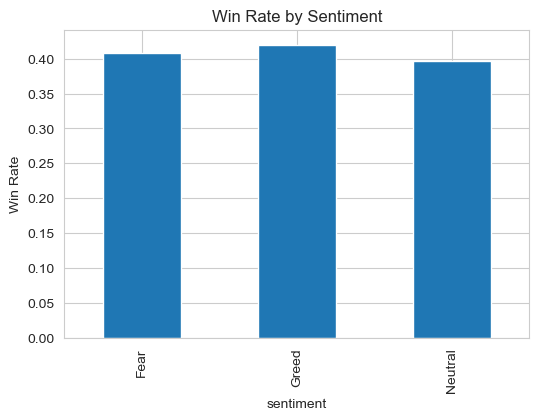

In [20]:
win_by_sentiment.plot(kind='bar', figsize=(6,4))
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.show()

In [21]:
volatility = merged.groupby('sentiment')['Closed PnL'].std()
print(volatility)

sentiment
Fear       990.875398
Greed      976.964281
Neutral    517.122220
Name: Closed PnL, dtype: float64


sentiment
Fear       83237
Greed      90295
Neutral    37686
dtype: int64


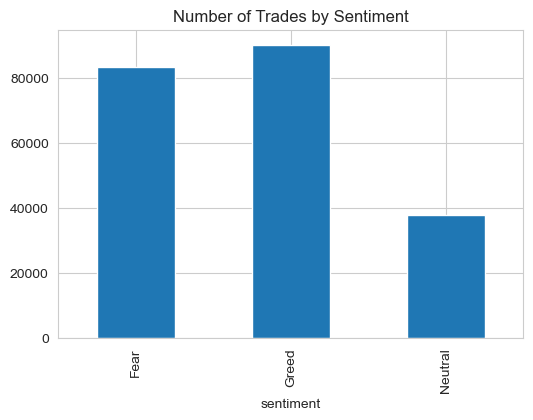

In [22]:
trade_freq = merged.groupby('sentiment').size()
print(trade_freq)

trade_freq.plot(kind='bar', figsize=(6,4))
plt.title("Number of Trades by Sentiment")
plt.show()

In [23]:
size_by_sentiment = merged.groupby('sentiment')['Size USD'].mean()
print(size_by_sentiment)

sentiment
Fear       7182.011019
Greed      4574.424490
Neutral    4782.732661
Name: Size USD, dtype: float64


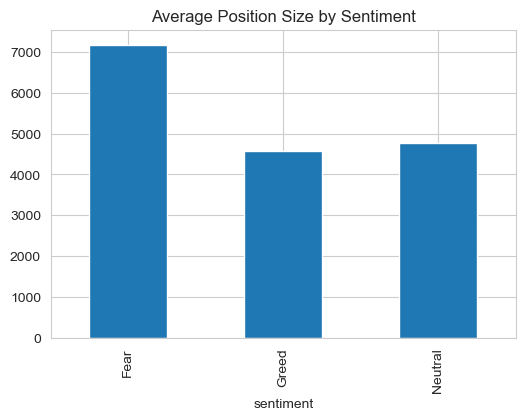

In [24]:
size_by_sentiment.plot(kind='bar', figsize=(6,4))
plt.title("Average Position Size by Sentiment")
plt.show()

In [25]:
long_short = pd.crosstab(
    merged['sentiment'],
    merged['Side'],
    normalize='index'
)

print(long_short)

Side            BUY      SELL
sentiment                    
Fear       0.495032  0.504968
Greed      0.470857  0.529143
Neutral    0.503343  0.496657


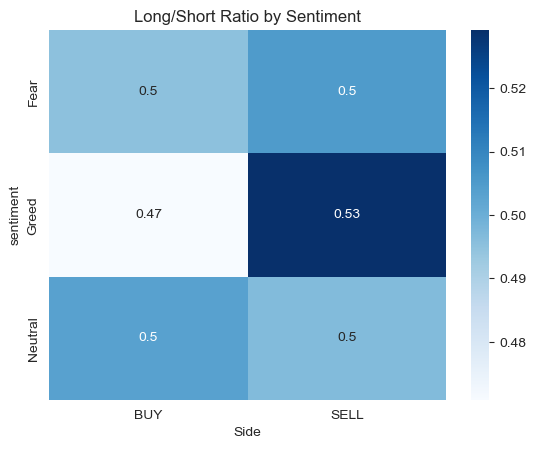

In [26]:
sns.heatmap(long_short, annot=True, cmap="Blues")
plt.title("Long/Short Ratio by Sentiment")
plt.show()

In [27]:
trade_counts = merged.groupby('Account').size()
median_trades = trade_counts.median()

merged['trader_type'] = merged['Account'].map(
    lambda x: 'Frequent' if trade_counts[x] > median_trades else 'Infrequent'
)

segment_pnl = merged.groupby(['trader_type','sentiment'])['Closed PnL'].mean().unstack()
print(segment_pnl)

sentiment         Fear       Greed    Neutral
trader_type                                  
Frequent     47.325875   41.476621  34.579701
Infrequent   61.968833  155.896341  31.845656


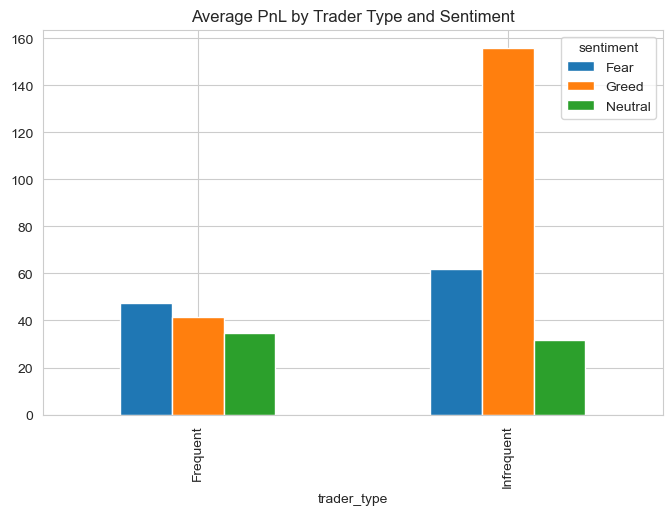

In [28]:
segment_pnl.plot(kind='bar', figsize=(8,5))
plt.title("Average PnL by Trader Type and Sentiment")
plt.show()

sentiment          Fear       Greed    Neutral
consistency                                   
Consistent     6.734244   27.548685   3.493386
Inconsistent  90.920235  125.211317  83.021460


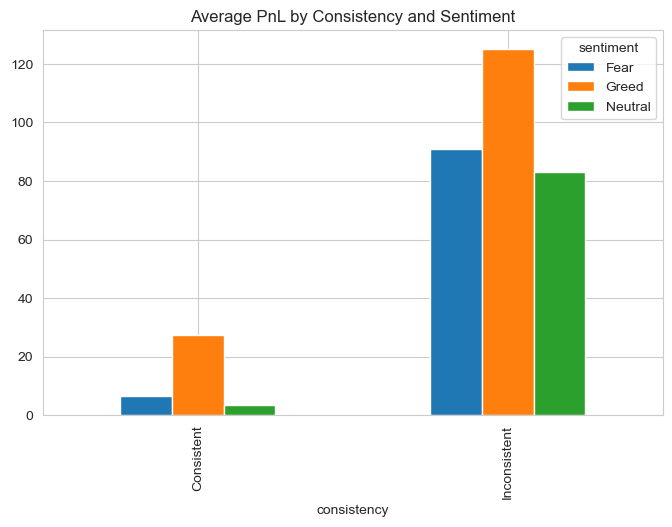

In [29]:
pnl_stats = merged.groupby('Account')['Closed PnL'].agg(['mean','std']).reset_index()

threshold = pnl_stats['std'].median()

pnl_stats['consistency'] = pnl_stats['std'].apply(
    lambda x: 'Consistent' if x < threshold else 'Inconsistent'
)

merged = merged.merge(pnl_stats[['Account','consistency']], on='Account')

consistency_pnl = merged.groupby(['consistency','sentiment'])['Closed PnL'].mean().unstack()
print(consistency_pnl)

consistency_pnl.plot(kind='bar', figsize=(8,5))
plt.title("Average PnL by Consistency and Sentiment")
plt.show()

In [30]:
daily_data = merged.groupby(['Account','date','sentiment']).agg({
    'Closed PnL':'sum',
    'Size USD':'mean',
    'win':'mean'
}).reset_index()

daily_data.head()

,Account,date,sentiment,Closed PnL,Size USD,win
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Greed,0.0,5089.718249,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Greed,0.0,7976.664412,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Greed,0.0,23734.500000,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Greed,-21227.0,28186.666667,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Greed,1603.1,17248.148148,0.444444


In [31]:
daily_data['profitable_day'] = (daily_data['Closed PnL'] > 0).astype(int)

daily_data['sentiment_encoded'] = daily_data['sentiment'].map({
    'Fear': 0,
    'Greed': 1
})

daily_data[['Closed PnL','profitable_day','sentiment','sentiment_encoded']].head()

,Closed PnL,profitable_day,sentiment,sentiment_encoded
0,0.0,0,Greed,1.0
1,0.0,0,Greed,1.0
2,0.0,0,Greed,1.0
3,-21227.0,0,Greed,1.0
4,1603.1,1,Greed,1.0


In [32]:
from sklearn.model_selection import train_test_split

features = ['sentiment_encoded', 'Size USD', 'win']

model_data = daily_data[features + ['profitable_day']].dropna()

X = model_data[features]
y = model_data['profitable_day']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 1571
Testing samples: 393


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained successfully.")

Model trained successfully.


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9389312977099237

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       137
           1       0.97      0.94      0.95       256

    accuracy                           0.94       393
   macro avg       0.93      0.94      0.93       393
weighted avg       0.94      0.94      0.94       393



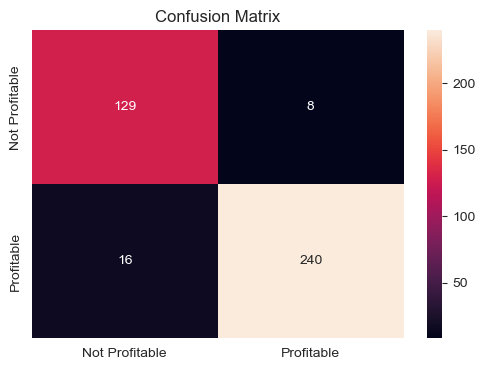

In [38]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Not Profitable','Profitable'],
            yticklabels=['Not Profitable','Profitable'])
plt.title("Confusion Matrix")
plt.show()

In [36]:
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})

importance = importance.sort_values(by='Coefficient', ascending=False)

importance

,Feature,Coefficient
2,win,10.133555
0,sentiment_encoded,0.331259
1,Size USD,-0.000005


C:\Users\misra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


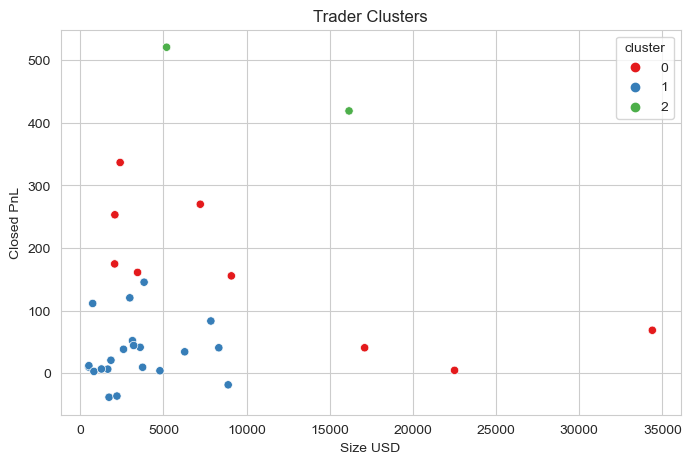

In [37]:
trader_features = merged.groupby('Account').agg({
    'Closed PnL':'mean',
    'Size USD':'mean',
    'win':'mean'
}).reset_index()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(
    trader_features[['Closed PnL','Size USD','win']]
)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
trader_features['cluster'] = kmeans.fit_predict(scaled_features)

trader_features.head()

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Size USD',
    y='Closed PnL',
    hue='cluster',
    data=trader_features,
    palette='Set1'
)
plt.title("Trader Clusters")
plt.show()